# Fruit Classification using CNN
##### -Mayank Srivastava
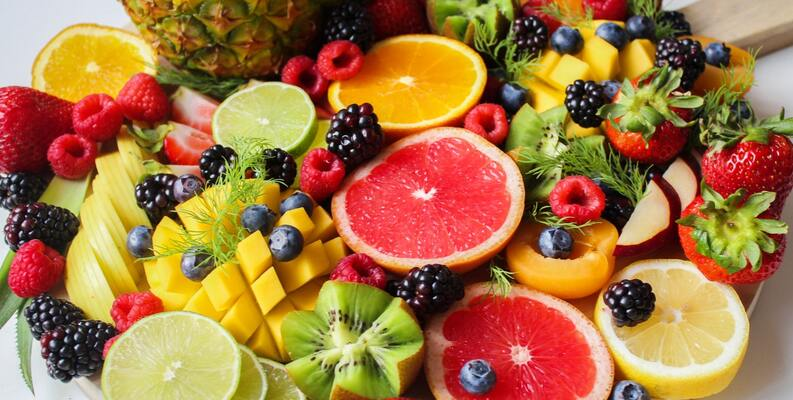

## About Dataset

### Objective 
- To classify images of different fruits using a CNN model.
### Dataset
- Total number of images: 22495.
- Training set size: 16854 images (one fruit or vegetable per image).
- Test set size: 5641 images (one fruit or vegetable per image).
- Number of classes: 33 (fruits and vegetables).
- Image size: 100x100 pixels.
- Training data filename format: Many images are also rotated, to help training.


### Content
- train - the training folder that contains 33 subfolders in which training images for each fruit/vegetable are located. There is a total of 16854 images.
- test - the testing folder that contains 5641 testing images



In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [2]:
# Set seeds for reproducibility
import random
seed = 42
random.seed(seed)             # Sets the seed for Python's built-in random module.
np.random.seed(seed)          # Sets the seed for NumPy's random number generator.
tf.random.set_seed(seed)      # Sets the seed for TensorFlow's random operations.

In [3]:
import shutil
import os
from sklearn.model_selection import train_test_split

> #### Setting the direcory for train, test, val image data sets

In [4]:
source =r'E:\DS journey\Deep Learning Datasets\Fruit Classification Dataset\Main Set'
train_dir =r'E:\DS journey\Deep Learning Datasets\Fruit Classification Dataset\TRAIN'
test_dir =r'E:\DS journey\Deep Learning Datasets\Fruit Classification Dataset\TEST'

In [5]:
classes =[i for i in os.listdir(source)]
classes

['Apple Braeburn',
 'Apple Granny Smith',
 'Apricot',
 'Avocado',
 'Banana',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe',
 'Cherry',
 'Clementine',
 'Corn',
 'Cucumber Ripe',
 'Grape Blue',
 'Kiwi',
 'Lemon',
 'Limes',
 'Mango',
 'Onion White',
 'Orange',
 'Papaya',
 'Passion Fruit',
 'Peach',
 'Pear',
 'Pepper Green',
 'Pepper Red',
 'Pineapple',
 'Plum',
 'Pomegranate',
 'Potato Red',
 'Raspberry',
 'Strawberry',
 'Tomato',
 'Watermelon']

> #### Set of code to be run ONLY ONCE for cretaing sub-folder and shifting image files in train and test 

In [6]:
# creating directories in TRAIN & TEST, based in Main set
# This code needs to executed only once


# for i in classes:
#     os.mkdir(os.path.join(train_dir,i))
#     os.mkdir(os.path.join(test_dir,i))

In [7]:
# for i in os.listdir(source):
#     j= os.path.join(source,i)

#     all_images = os.listdir(j)
#     train_images, test_images =train_test_split(all_images, test_size =0.2, random_state =42)

#     for img in train_images:
#         shutil.copy(os.path.join(source,i, img), os.path.join(train_dir,i,img))

#     for img in test_images:
#         shutil.copy(os.path.join(source,i, img), os.path.join(test_dir,i,img))

In [25]:
d = {"Classes":[i for i in os.listdir(source)],
    "Total_images":[len(os.listdir(os.path.join(source,i))) for i in os.listdir(source)],
     "Train_images":[len(os.listdir(os.path.join(train_dir,i))) for i in os.listdir(train_dir)],
     "Test_images":[len(os.listdir(os.path.join(test_dir,i))) for i in os.listdir(test_dir)],
}

df=pd.DataFrame(d)
df

,Classes,Total_images,Train_images,Test_images
0,Apple Braeburn,492,393,99
1,Apple Granny Smith,492,393,99
2,Apricot,492,393,99
3,Avocado,427,341,86
4,Banana,490,392,98
5,Blueberry,462,369,93
6,Cactus fruit,490,392,98
7,Cantaloupe,492,393,99
8,Cherry,492,393,99
9,Clementine,490,392,98


In [9]:
image_width =image_height =128
batch_size =32

In [26]:
df[['Total_images','Train_images','Test_images']].sum()

Total_images    16854
Train_images    13471
Test_images      3383
dtype: int64

>#### Creating the ImageDataGenerator instance for test and train

In [10]:
# Datagenerators with augmentation
train_datagen= ImageDataGenerator(rescale = 1/255,
                                  rotation_range=40,
                                  width_shift_range =0.2,
                                  height_shift_range =0.2,
                                  shear_range =0.2,
                                  zoom_range =0.2,
                                  horizontal_flip = True,)
test_datagen= ImageDataGenerator(rescale =1/255)

>#### Loading the image data from local direcotry

In [11]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size= (image_width,image_height),
                                                    batch_size =batch_size,
                                                    class_mode ='categorical')
test_generator = train_datagen.flow_from_directory(test_dir,
                                                   target_size= (image_width,image_height),
                                                    batch_size =batch_size,
                                                    class_mode ='categorical')

Found 13471 images belonging to 33 classes.
Found 3383 images belonging to 33 classes.


>#### CNN Model Architecture

In [12]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width,image_height, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

## ANN
model.add(Dense(128, activation='relu'))

model.add(Dense(66, activation='relu')) # hidden

model.add(Dropout(0.5))  # Regularization to prevent overfitting
model.add(Dense(33, activation='sigmoid'))  # Output layer (cat or dog)

E:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Use categorical_crossentropy for multi-class classification
    metrics=['accuracy']
)

# Print model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 66)             │         8,514 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 33)             │         2,211 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,315,365 (12.65 MB)

 Trainable params: 3,315,365 (12.65 MB)

 Non-trainable params: 0 (0.00 B)

>#### Using ModelCheckpoint Callback

In [14]:
# Define ModelCheckpoint callback to save the best weights
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(r'best_model.keras', 
                             monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[checkpoint],
    shuffle = False
)

# Load the best weights
model.load_weights('best_model.keras')



Epoch 1/10


E:\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


421/421 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2096 - loss: 2.6787
Epoch 1: val_accuracy improved from -inf to 0.73219, saving model to best_model.keras
421/421 ━━━━━━━━━━━━━━━━━━━━ 667s 2s/step - accuracy: 0.2099 - loss: 2.6770 - val_accuracy: 0.7322 - val_loss: 0.6874
Epoch 2/10
421/421 ━━━━━━━━━━━━━━━━━━━━ 0s 613ms/step - accuracy: 0.6846 - loss: 0.8565
Epoch 2: val_accuracy improved from 0.73219 to 0.91576, saving model to best_model.keras
421/421 ━━━━━━━━━━━━━━━━━━━━ 307s 729ms/step - accuracy: 0.6847 - loss: 0.8562 - val_accuracy: 0.9158 - val_loss: 0.2562
Epoch 3/10
421/421 ━━━━━━━━━━━━━━━━━━━━ 0s 624ms/step - accuracy: 0.8356 - loss: 0.4639
Epoch 3: val_accuracy improved from 0.91576 to 0.94827, saving model to best_model.keras
421/421 ━━━━━━━━━━━━━━━━━━━━ 312s 741ms/step - accuracy: 0.8357 - loss: 0.4638 - val_accuracy: 0.9483 - val_loss: 0.1435
Epoch 4/10
421/421 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.8910 - loss: 0.3147
Epoch 4: val_accuracy improved from 0.

> #### Model-evaluation

In [16]:
# Load the best weights
model.load_weights('best_model.keras')

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')

# Evaluate the model
train_loss, train_accuracy = model.evaluate(train_generator)
print(f'Train accuracy: {train_accuracy:.4f}')
print(f'Train loss: {train_loss:.4f}')

106/106 ━━━━━━━━━━━━━━━━━━━━ 49s 461ms/step - accuracy: 0.9918 - loss: 0.0263
Test accuracy: 0.9905
Test loss: 0.0287
421/421 ━━━━━━━━━━━━━━━━━━━━ 387s 919ms/step - accuracy: 0.9914 - loss: 0.0275
Train accuracy: 0.9927
Train loss: 0.0253


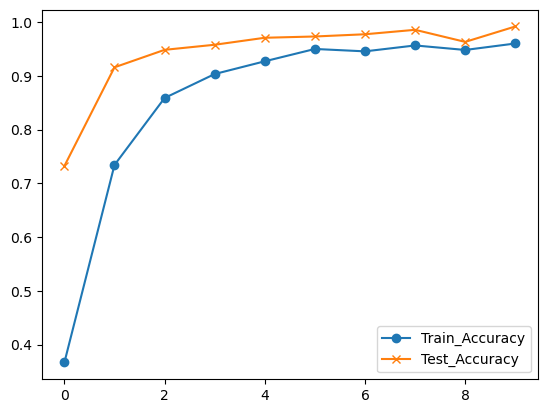

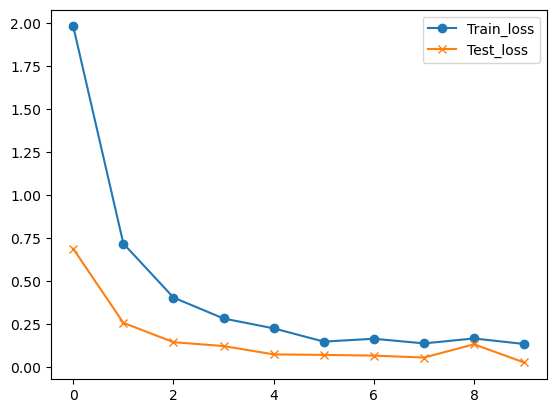

In [19]:
# Plot accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], marker ='o' ,label ='Train_Accuracy')
plt.plot(history.history['val_accuracy'], marker ='x',label ='Test_Accuracy')
plt.legend()
plt.show()

# Similar plot for loss
plt.plot(history.history['loss'], marker ='o',label ='Train_loss')
plt.plot(history.history['val_loss'],marker ='x',label ='Test_loss')
plt.legend()
plt.show()

>#### Make Predictions

In [27]:
# we are using thr 5641 images provided for prediction in testSet folder
import os
# Load and preprocess a single image
img_paths= [os.path.join(r'E:\DS journey\Deep Learning Datasets\Fruit Classification Dataset\test_samples\test', i) for i in \
                        os.listdir(r'E:\DS journey\Deep Learning Datasets\Fruit Classification Dataset\test_samples\test')]
            
len(img_paths)

5641

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


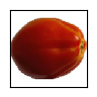

The Fruit as per model is: Tomato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


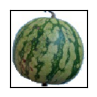

The Fruit as per model is: Watermelon
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


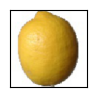

The Fruit as per model is: Lemon
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


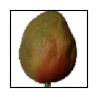

The Fruit as per model is: Papaya
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


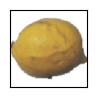

The Fruit as per model is: Lemon
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


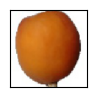

The Fruit as per model is: Apricot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


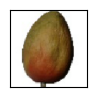

The Fruit as per model is: Papaya
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


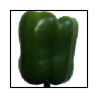

The Fruit as per model is: Pepper Green
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


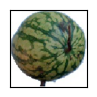

The Fruit as per model is: Watermelon
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


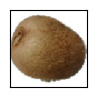

The Fruit as per model is: Kiwi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


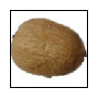

The Fruit as per model is: Kiwi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


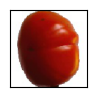

The Fruit as per model is: Tomato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


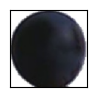

The Fruit as per model is: Grape Blue
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


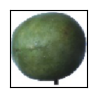

The Fruit as per model is: Mango
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


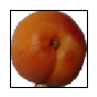

The Fruit as per model is: Apricot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


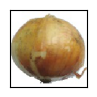

The Fruit as per model is: Onion White
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


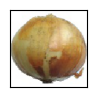

The Fruit as per model is: Onion White
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


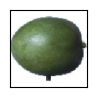

The Fruit as per model is: Mango
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


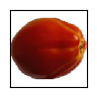

The Fruit as per model is: Tomato
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


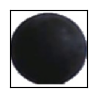

The Fruit as per model is: Grape Blue
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


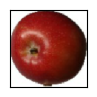

The Fruit as per model is: Apple Braeburn
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


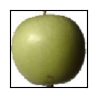

The Fruit as per model is: Apple Granny Smith
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


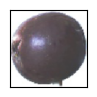

The Fruit as per model is: Passion Fruit
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


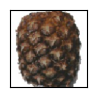

The Fruit as per model is: Pineapple
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


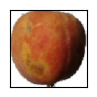

The Fruit as per model is: Peach
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


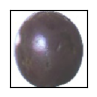

The Fruit as per model is: Passion Fruit
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


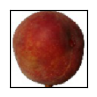

The Fruit as per model is: Peach
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


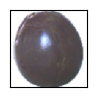

The Fruit as per model is: Passion Fruit
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


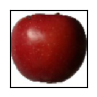

The Fruit as per model is: Apple Braeburn
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


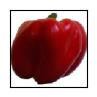

The Fruit as per model is: Pepper Red


In [29]:
img_path_=img_paths[3400:3430]  # enter indices here

for img_path in img_path_:
    
    # Load and preprocess a single image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    # Predict
    prediction = model.predict(img_array)
    predicted_labels = int(np.argmax(prediction, axis=1).reshape(1,1))
    # image plot part
    plt.figure(figsize =(1,1))
    plt.tick_params(left = False, right = False , labelleft = False , 
                    labelbottom = False, bottom = False)

    plt.imshow(img_array.reshape(128,128,3))
    plt.show()
    print("The Fruit as per model is:",df.Classes[predicted_labels])
    

## Observations
- Total no. of images is 22495, Training set has 16854 images and Test set has 5641 images.
- The Fruit Dataset has 33 classes.
- Firstly created the TRAIN & TEST folders and sub-folders based on classes.
- Using the shutil library copied images from source to respective directories maintaining a 80-20 split.
- Loaded the image data using ImageDataGenrator class object and methods.
- CNN model was created and Results after 10 epochs with 3 Conv layers, 3 max pooling and 3 Dense layers is as follows:
    - Train accuracy: 0.9927- loss: 0.0253
    - Test accuracy: 0.9905- loss: 0.0287